# Project GEVPRO (H&M) - MAIN

We will work with the following dataset: 
Source: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview
This dataset has been reduced to use less memory. Only sales data from > 08-01-2020 is selected. 

In [3]:
# Used libaries:
%matplotlib inline
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/customers.csv', low_memory=False)
df = df.dropna(subset=['age', 'postal_code'])  # drop rows with missing values in this column
df.shape

(1356119, 7)

### 0.  Research questions:
We try to answer the following research questions:
1. 
2. 
3. 




### 1.  Reducing the dataset: 
This is only ran on the default dataset (transactions_train.csv) found on kaggle to reduce the memory size to 91.3mb (instead of 3+gb).

In [4]:
# df = pd.read_csv('data/transactions_train.csv', low_memory=False)
# df['t_dat'] = pd.to_datetime(df['t_dat'])
# mask = df['t_dat'] > '08-01-2020'
# df_reduced = df.loc[mask]
# df_reduced.to_csv('C:\\Users\\Nils\\Jupyter Notebooks\\Project_gevpro\\transactions_reduced.csv')

In [5]:
# This loads the reduced transaction (sales) dataset.
df = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

### 2. Exploring the data

In [6]:
df = pd.read_csv('data/customers.csv', low_memory=False)

What is the most frequent age of H&M customers?

In [7]:
#What are the 10 most frequent ages?
df["age"].value_counts().head(10)

#The most frequent age is 21, and the most people shopping at H&M are between 20 and 30


21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
26.0    53658
22.0    51869
27.0    49134
28.0    44294
29.0    40697
Name: age, dtype: int64

What is the distribution of the ages of H&M customers? 

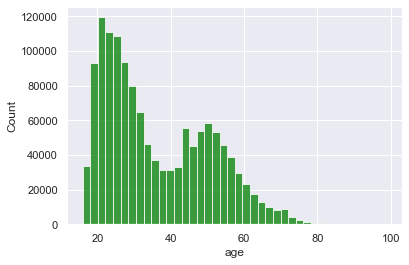

In [8]:
#What is the distribution of age?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="age", data=df, color='green', bins=40)

#the distribution of age centers around 20/30 and 45/55.

What is the most frequent postal code? 

In [9]:
#what are the 10 most frequent postal codes
df['postal_code'].value_counts().head(10)

#the most frequent postal code appears to be a value that gives 120303

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c       154
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358       141
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd       138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb       134
4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d       132
Name: postal_code, dtype: int64

How many customers have a club membership?

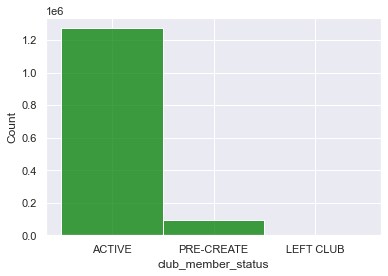

In [10]:
#how many customers have a club_membership?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="club_member_status", data=df, color='green', bins=40)

#The biggest part of the customers have a club membership

What kind of fashion news frequency is most popular with what club membership?

In [11]:
#uniting the values that all mean none but have different named values for this 
df.loc[~df['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'

In [12]:
#showing the new values for fashion news frequency
df['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [13]:
#the club_member_status against the fashion news frequency
pd.crosstab(df['club_member_status'], df['fashion_news_frequency'])

#There are no people that leave the club that have monthly news updates. 
#The people that have no news updates, which are the most people that leave the club, dont receive fashion news. 
#The most people have an active status but do not receive news updates. 

fashion_news_frequency,Monthly,None,Regularly
club_member_status,,,
ACTIVE,778,800409,471304
LEFT CLUB,0,459,8
PRE-CREATE,59,87114,5787


How many people receive fashion news? 

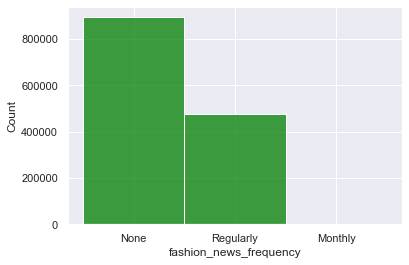

In [15]:
# division of fashion_news_frequency
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="fashion_news_frequency", data=df, color='green', bins=40)

#most people don't like to receive fashion news

What is the spread of fashion news in contrast to club member status?

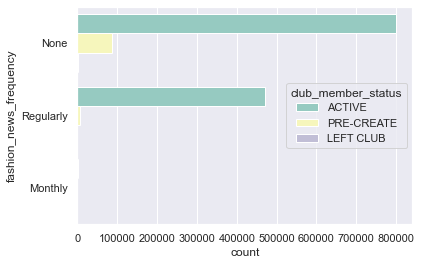

In [ ]:
# A visual representation of the fashion news frequency and the club member status
fashion_status = sns.countplot(y='fashion_news_frequency', hue='club_member_status', data=df, palette="Set3")

What is the relation between receiving fashion news and the customers age?

In [16]:
#fashion news in relation to age 
pd.crosstab(df['fashion_news_frequency'], df['age'], margins=True)

age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,All
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,0,0,0,6,10,16,16,26,22,31,...,0,0,0,0,0,0,0,0,0,841
None,86,6405,16216,22646,33292,40891,31905,35318,37744,37778,...,12,10,4,2,8,3,3,5,8,879067
Regularly,75,2987,8107,15055,21894,26623,19948,19523,18358,17180,...,4,7,0,1,2,0,1,2,5,476211
All,161,9392,24323,37707,55196,67530,51869,54867,56124,54989,...,16,17,4,3,10,3,4,7,13,1356119


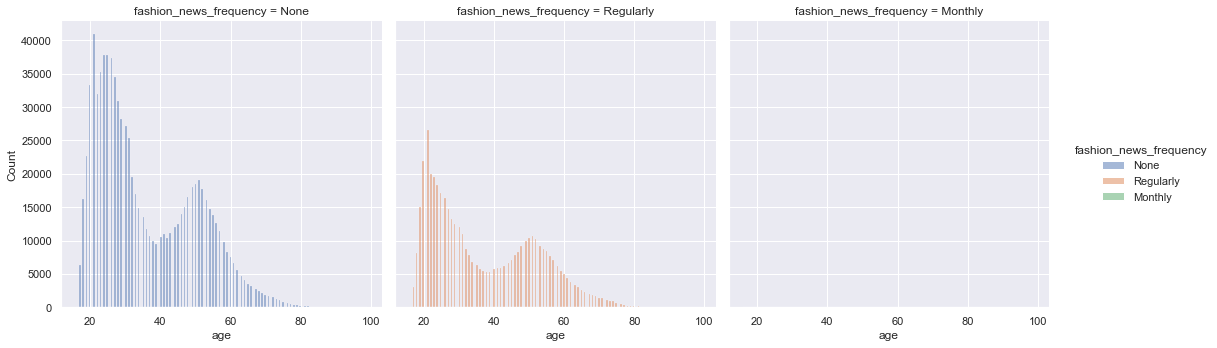

In [17]:
#fashion news frequency in relation to age 
sns.displot(data=df, x="age", hue="fashion_news_frequency", col="fashion_news_frequency")

#the highest amount of customers don't receive fashion news
#There are almost no people that receive fashion news monthly

README file submission for customers


In the customer section of this project we have explored the following research questions:
What is the most frequent age of H&M customers?
What is the distribution of the ages of H&M customers? 
What is the most frequent postal code? 
How many customers have a club membership?
What kind of fashion news frequency is most popular with what club membership?
How many people receive fashion news? 
What is the spread of fashion news in contrast to club member status?
What is the relation between receiving fashion news and the customers age?

We have expressed the data in different ways, varying from plots to tables. With this research, we try to create a better overview of the customers shopping at H&M.

